# TESTS AND FINAL BENCHMARKS

In [1]:
from imgaug.augmentables.batches import UnnormalizedBatch
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from lightgbm.sklearn import LGBMClassifier
from xgboost.sklearn import XGBClassifier
from imgaug import augmenters as iaa
from IPython.display import display 
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from PIL import Image
import random_forest
import imgaug as ia
import pandas as pd
import numpy as np
import time

%matplotlib inline
np.random.bit_generator = np.random._bit_generator
np.seterr(divide='ignore', invalid='ignore') 
plt.style.use('seaborn-whitegrid')

In [2]:
df_train = pd.read_csv('./data/fashion-mnist_train.csv', sep=',')
df_test = pd.read_csv('./data/fashion-mnist_test.csv', sep=',')
data_train = df_train.values
x_train = data_train[:, 1:]
y_train = data_train[:, 0]

data_test = df_test.values
x_test = data_test[:, 1:]
y_test = data_test[:, 0]

## Testing our solution

In [3]:
hp = {"min_child_in_leaf":[10,50,200],"min_to_split":[200,100,50],"subsample_size":[1000,2000,3000]}
best_hp = random_forest.nested_cross_val(df_train,3,4,hp)

best external fold acc: 0.5492 -- hyperparams (50, 100, 3000)


In [5]:
test_errs=[]
for n_class in range(1,1001):
    start_time = time.time()
    rf = random_forest.RandomForest(n_classifiers=n_class,subsample_size=best_hp[2],min_child_in_leaf=best_hp[0],min_to_split=best_hp[1])  # optimal 100 trees
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    acc = random_forest.accuracy(y_test, y_pred) 
    test_errs.append(1.0-acc)
    print(f'n_trees: {n_class} --- RF accuracy : {acc}')
    print(f'--- Running time: {time.time() - start_time} seconds ---')

n_trees: 1 --- RF accuracy : 0.2441
--- Running time: 7.628251552581787 seconds ---
n_trees: 2 --- RF accuracy : 0.5553
--- Running time: 4.401468515396118 seconds ---
n_trees: 3 --- RF accuracy : 0.3739
--- Running time: 5.549834489822388 seconds ---
n_trees: 4 --- RF accuracy : 0.4021
--- Running time: 8.988340854644775 seconds ---
n_trees: 5 --- RF accuracy : 0.4941
--- Running time: 7.484716892242432 seconds ---
n_trees: 6 --- RF accuracy : 0.4731
--- Running time: 9.828475952148438 seconds ---
n_trees: 7 --- RF accuracy : 0.3841
--- Running time: 12.059232950210571 seconds ---
n_trees: 8 --- RF accuracy : 0.398
--- Running time: 11.210589170455933 seconds ---
n_trees: 9 --- RF accuracy : 0.4026
--- Running time: 10.972723484039307 seconds ---
n_trees: 10 --- RF accuracy : 0.5182
--- Running time: 12.409909963607788 seconds ---
n_trees: 11 --- RF accuracy : 0.456
--- Running time: 12.913606882095337 seconds ---
n_trees: 12 --- RF accuracy : 0.48
--- Running time: 15.084875345230103

n_trees: 97 --- RF accuracy : 0.5928
--- Running time: 28.61064577102661 seconds ---
n_trees: 98 --- RF accuracy : 0.528
--- Running time: 27.970991849899292 seconds ---
n_trees: 99 --- RF accuracy : 0.5113
--- Running time: 28.715585947036743 seconds ---
n_trees: 100 --- RF accuracy : 0.5328
--- Running time: 30.29374051094055 seconds ---
n_trees: 101 --- RF accuracy : 0.5385
--- Running time: 28.954439401626587 seconds ---
n_trees: 102 --- RF accuracy : 0.5146
--- Running time: 29.404221773147583 seconds ---
n_trees: 103 --- RF accuracy : 0.505
--- Running time: 29.256227254867554 seconds ---
n_trees: 104 --- RF accuracy : 0.5706
--- Running time: 30.81437587738037 seconds ---
n_trees: 105 --- RF accuracy : 0.5511
--- Running time: 30.392622232437134 seconds ---
n_trees: 106 --- RF accuracy : 0.5102
--- Running time: 30.833359956741333 seconds ---
n_trees: 107 --- RF accuracy : 0.5212
--- Running time: 31.17616844177246 seconds ---
n_trees: 108 --- RF accuracy : 0.5617
--- Running ti

n_trees: 193 --- RF accuracy : 0.57
--- Running time: 46.05066108703613 seconds ---
n_trees: 194 --- RF accuracy : 0.51
--- Running time: 46.35548734664917 seconds ---
n_trees: 195 --- RF accuracy : 0.5244
--- Running time: 47.383902072906494 seconds ---
n_trees: 196 --- RF accuracy : 0.5669
--- Running time: 48.37534475326538 seconds ---
n_trees: 197 --- RF accuracy : 0.5383
--- Running time: 47.9945330619812 seconds ---
n_trees: 198 --- RF accuracy : 0.5718
--- Running time: 47.929585456848145 seconds ---
n_trees: 199 --- RF accuracy : 0.5513
--- Running time: 48.4632773399353 seconds ---
n_trees: 200 --- RF accuracy : 0.5197
--- Running time: 47.7057158946991 seconds ---
n_trees: 201 --- RF accuracy : 0.5125
--- Running time: 49.07193088531494 seconds ---
n_trees: 202 --- RF accuracy : 0.5648
--- Running time: 48.853058099746704 seconds ---
n_trees: 203 --- RF accuracy : 0.5388
--- Running time: 48.80708169937134 seconds ---
n_trees: 204 --- RF accuracy : 0.589
--- Running time: 48.

n_trees: 289 --- RF accuracy : 0.5722
--- Running time: 65.79537773132324 seconds ---
n_trees: 290 --- RF accuracy : 0.5103
--- Running time: 65.91829061508179 seconds ---
n_trees: 291 --- RF accuracy : 0.544
--- Running time: 67.4054536819458 seconds ---
n_trees: 292 --- RF accuracy : 0.5716
--- Running time: 67.30158162117004 seconds ---
n_trees: 293 --- RF accuracy : 0.5338
--- Running time: 65.14673972129822 seconds ---
n_trees: 294 --- RF accuracy : 0.5803
--- Running time: 65.90132021903992 seconds ---
n_trees: 295 --- RF accuracy : 0.5628
--- Running time: 67.19763398170471 seconds ---
n_trees: 296 --- RF accuracy : 0.5859
--- Running time: 65.85832905769348 seconds ---
n_trees: 297 --- RF accuracy : 0.5252
--- Running time: 66.53794360160828 seconds ---
n_trees: 298 --- RF accuracy : 0.5664
--- Running time: 67.54536819458008 seconds ---
n_trees: 299 --- RF accuracy : 0.5664
--- Running time: 67.17757797241211 seconds ---
n_trees: 300 --- RF accuracy : 0.5184
--- Running time: 

n_trees: 385 --- RF accuracy : 0.5687
--- Running time: 82.58375954627991 seconds ---
n_trees: 386 --- RF accuracy : 0.5414
--- Running time: 83.46126413345337 seconds ---
n_trees: 387 --- RF accuracy : 0.5749
--- Running time: 82.17999792098999 seconds ---
n_trees: 388 --- RF accuracy : 0.5388
--- Running time: 82.76965951919556 seconds ---
n_trees: 389 --- RF accuracy : 0.5173
--- Running time: 83.39430332183838 seconds ---
n_trees: 390 --- RF accuracy : 0.5684
--- Running time: 84.16286277770996 seconds ---
n_trees: 391 --- RF accuracy : 0.5663
--- Running time: 81.87721228599548 seconds ---
n_trees: 392 --- RF accuracy : 0.5651
--- Running time: 83.5602080821991 seconds ---
n_trees: 393 --- RF accuracy : 0.5078
--- Running time: 82.66571927070618 seconds ---
n_trees: 394 --- RF accuracy : 0.533
--- Running time: 82.57976722717285 seconds ---
n_trees: 395 --- RF accuracy : 0.5886
--- Running time: 84.57761740684509 seconds ---
n_trees: 396 --- RF accuracy : 0.5685
--- Running time: 

n_trees: 481 --- RF accuracy : 0.5673
--- Running time: 100.54849171638489 seconds ---
n_trees: 482 --- RF accuracy : 0.5106
--- Running time: 99.90985703468323 seconds ---
n_trees: 483 --- RF accuracy : 0.5185
--- Running time: 101.35403203964233 seconds ---
n_trees: 484 --- RF accuracy : 0.548
--- Running time: 100.55249524116516 seconds ---
n_trees: 485 --- RF accuracy : 0.5088
--- Running time: 100.54650115966797 seconds ---
n_trees: 486 --- RF accuracy : 0.5722
--- Running time: 101.54192399978638 seconds ---
n_trees: 487 --- RF accuracy : 0.5685
--- Running time: 101.40699744224548 seconds ---
n_trees: 488 --- RF accuracy : 0.5123
--- Running time: 100.35459661483765 seconds ---
n_trees: 489 --- RF accuracy : 0.5738
--- Running time: 100.33561325073242 seconds ---
n_trees: 490 --- RF accuracy : 0.5764
--- Running time: 104.06248593330383 seconds ---
n_trees: 491 --- RF accuracy : 0.5151
--- Running time: 101.38201093673706 seconds ---
n_trees: 492 --- RF accuracy : 0.5696
--- Run

n_trees: 576 --- RF accuracy : 0.5738
--- Running time: 118.13143515586853 seconds ---
n_trees: 577 --- RF accuracy : 0.5662
--- Running time: 118.59018754959106 seconds ---
n_trees: 578 --- RF accuracy : 0.5627
--- Running time: 117.87156891822815 seconds ---
n_trees: 579 --- RF accuracy : 0.5141
--- Running time: 119.76450085639954 seconds ---
n_trees: 580 --- RF accuracy : 0.5632
--- Running time: 117.6956934928894 seconds ---
n_trees: 581 --- RF accuracy : 0.516
--- Running time: 118.19239068031311 seconds ---
n_trees: 582 --- RF accuracy : 0.5428
--- Running time: 118.86501145362854 seconds ---
n_trees: 583 --- RF accuracy : 0.5437
--- Running time: 118.35629057884216 seconds ---
n_trees: 584 --- RF accuracy : 0.5451
--- Running time: 119.65256142616272 seconds ---
n_trees: 585 --- RF accuracy : 0.5659
--- Running time: 120.2242259979248 seconds ---
n_trees: 586 --- RF accuracy : 0.559
--- Running time: 120.5130729675293 seconds ---
n_trees: 587 --- RF accuracy : 0.5529
--- Runnin

n_trees: 671 --- RF accuracy : 0.5123
--- Running time: 133.9763641357422 seconds ---
n_trees: 672 --- RF accuracy : 0.5619
--- Running time: 134.43811631202698 seconds ---
n_trees: 673 --- RF accuracy : 0.5085
--- Running time: 135.09472489356995 seconds ---
n_trees: 674 --- RF accuracy : 0.5691
--- Running time: 134.9947898387909 seconds ---
n_trees: 675 --- RF accuracy : 0.5167
--- Running time: 136.75578236579895 seconds ---
n_trees: 676 --- RF accuracy : 0.5714
--- Running time: 135.79932975769043 seconds ---
n_trees: 677 --- RF accuracy : 0.5623
--- Running time: 138.05008149147034 seconds ---
n_trees: 678 --- RF accuracy : 0.5299
--- Running time: 135.83431029319763 seconds ---
n_trees: 679 --- RF accuracy : 0.572
--- Running time: 138.40585255622864 seconds ---
n_trees: 680 --- RF accuracy : 0.5505
--- Running time: 135.7083821296692 seconds ---
n_trees: 681 --- RF accuracy : 0.5061
--- Running time: 138.91654658317566 seconds ---
n_trees: 682 --- RF accuracy : 0.5579
--- Runni

n_trees: 766 --- RF accuracy : 0.5521
--- Running time: 150.87370824813843 seconds ---
n_trees: 767 --- RF accuracy : 0.5242
--- Running time: 152.6426966190338 seconds ---
n_trees: 768 --- RF accuracy : 0.5107
--- Running time: 152.10400438308716 seconds ---
n_trees: 769 --- RF accuracy : 0.5598
--- Running time: 153.21237015724182 seconds ---
n_trees: 770 --- RF accuracy : 0.5171
--- Running time: 152.20494651794434 seconds ---
n_trees: 771 --- RF accuracy : 0.5563
--- Running time: 152.12298703193665 seconds ---
n_trees: 772 --- RF accuracy : 0.548
--- Running time: 153.4932382106781 seconds ---
n_trees: 773 --- RF accuracy : 0.571
--- Running time: 154.40572476387024 seconds ---
n_trees: 774 --- RF accuracy : 0.5112
--- Running time: 152.228924036026 seconds ---
n_trees: 775 --- RF accuracy : 0.5566
--- Running time: 154.18782806396484 seconds ---
n_trees: 776 --- RF accuracy : 0.561
--- Running time: 155.4440643787384 seconds ---
n_trees: 777 --- RF accuracy : 0.5711
--- Running t

n_trees: 861 --- RF accuracy : 0.5753
--- Running time: 170.38786125183105 seconds ---
n_trees: 862 --- RF accuracy : 0.5542
--- Running time: 175.69492936134338 seconds ---
n_trees: 863 --- RF accuracy : 0.5338
--- Running time: 176.4013135433197 seconds ---
n_trees: 864 --- RF accuracy : 0.549
--- Running time: 173.82589316368103 seconds ---
n_trees: 865 --- RF accuracy : 0.5569
--- Running time: 177.7351953983307 seconds ---
n_trees: 866 --- RF accuracy : 0.5669
--- Running time: 179.30787062644958 seconds ---
n_trees: 867 --- RF accuracy : 0.5599
--- Running time: 182.05192589759827 seconds ---
n_trees: 868 --- RF accuracy : 0.5662
--- Running time: 173.74204277992249 seconds ---
n_trees: 869 --- RF accuracy : 0.5703
--- Running time: 176.38620138168335 seconds ---
n_trees: 870 --- RF accuracy : 0.561
--- Running time: 174.39256381988525 seconds ---
n_trees: 871 --- RF accuracy : 0.5609
--- Running time: 176.31298446655273 seconds ---
n_trees: 872 --- RF accuracy : 0.565
--- Runnin

n_trees: 956 --- RF accuracy : 0.5688
--- Running time: 186.30244493484497 seconds ---
n_trees: 957 --- RF accuracy : 0.5784
--- Running time: 187.30186533927917 seconds ---
n_trees: 958 --- RF accuracy : 0.56
--- Running time: 186.1095552444458 seconds ---
n_trees: 959 --- RF accuracy : 0.5616
--- Running time: 186.7451949119568 seconds ---
n_trees: 960 --- RF accuracy : 0.5241
--- Running time: 186.75120210647583 seconds ---
n_trees: 961 --- RF accuracy : 0.5633
--- Running time: 186.38941073417664 seconds ---
n_trees: 962 --- RF accuracy : 0.5643
--- Running time: 186.8421230316162 seconds ---
n_trees: 963 --- RF accuracy : 0.5653
--- Running time: 190.29226088523865 seconds ---
n_trees: 964 --- RF accuracy : 0.556
--- Running time: 189.24376320838928 seconds ---
n_trees: 965 --- RF accuracy : 0.5502
--- Running time: 188.21734952926636 seconds ---
n_trees: 966 --- RF accuracy : 0.5075
--- Running time: 186.61628341674805 seconds ---
n_trees: 967 --- RF accuracy : 0.5715
--- Running

The best performing model is at 65 trees ---> Accuracy 0.63

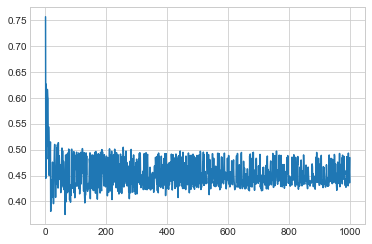

In [6]:
plt.plot(range(1,1001),test_errs)
plt.show(block=True)

# Data Augmentation

Augmentation done in 60.83s


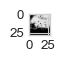

In [3]:
NB_BATCHES = 1
seq = iaa.Sequential([
    iaa.Affine(rotate=(-45, 45)),
    iaa.SaltAndPepper(0.1),
    iaa.Affine(shear=(-20, 20)),
    iaa.Fliplr(0.5),  
    iaa.CropAndPad(px=(-10, 10))
], random_order=True)

img_list_preaug = []

for i in range(len(x_train)):
    img_preaug = x_train[i,:].reshape((28,28)).astype(np.uint8)
    img_list_preaug.append(img_preaug)
    if i < 10:
        img = Image.fromarray(img_preaug)
        display(img)
        
batches = [UnnormalizedBatch(images=img_list_preaug) for _ in range(NB_BATCHES)]
time_start = time.time()
batches_aug = list(seq.augment_batches(batches, background=False))  # list() converts generator to list
time_end = time.time()

print("Augmentation done in %.2fs" % (time_end - time_start,))
ia.imshow(batches_aug[0].images_aug[0])

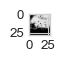

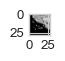

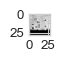

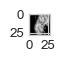

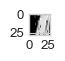

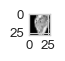

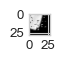

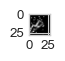

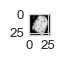

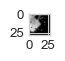

In [4]:
i=0
for ba in range(len(batches_aug)):
    for iaug in range(len(batches_aug[ba].images_aug)):
        x_train = np.vstack((x_train,batches_aug[ba].images_aug[iaug].reshape((784,)).astype(np.int64)))
        y_train = np.hstack((y_train,y_train[i]))
        if iaug < 10 and ba<1:
            ia.imshow(batches_aug[ba].images_aug[iaug])
        i+=1

## Test Augmentation

Augmentation slightly better up performances in this case.

In [6]:
x_train_aug, y_train_aug = shuffle(x_train, y_train)
start_time = time.time()
rf = random_forest.RandomForest(n_classifiers=500,subsample_size=6000,min_child_in_leaf=20,min_to_split=100)
rf.fit(x_train_aug, y_train_aug)
y_pred = rf.predict(x_test)
acc = random_forest.accuracy(y_test, y_pred) 
print(f'n_trees: {65} --- RF accuracy : {acc}')
print(f'--- Running time: {time.time() - start_time} seconds ---')

n_trees: 65 --- RF accuracy : 0.6541
--- Running time: 269.0903377532959 seconds ---


## XGBoost

In [19]:
param_test = {
 'min_split_loss':[200,100,50],
 'min_child_weight':[10,50,200],
 'subsample':[0.1,0.3,0.7]
}

gsearch_xgb = GridSearchCV(estimator = XGBClassifier(n_estimators=65, max_depth=10,colsample_bytree=0.03,
 objective= 'multi:softmax', nthread=4,seed=27), 
 param_grid = param_test, scoring='accuracy',n_jobs=4, cv=3)
gsearch_xgb.fit(x_train[:59999,:],y_train[:59999])

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.03, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=10, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=65, n_jobs=None, nthread=4,
                                     num_parallel_tree=None,
                                     objective='multi:softmax',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None

In [20]:
gsearch_xgb.best_params_

{'min_child_weight': 10, 'min_split_loss': 50, 'subsample': 0.7}

In [21]:
xgb_model = XGBClassifier(n_estimators=65, max_depth=10,colsample_bytree=0.03,min_child_weight=gsearch_xgb.best_params_['min_child_weight'],min_split_loss=gsearch_xgb.best_params_['min_split_loss'],subsample=gsearch_xgb.best_params_['subsample'],
 objective= 'multi:softmax', nthread=4,seed=27).fit(x_train[:59999,:],y_train[:59999])
y_pred = xgb_model.predict(x_test)
predictions = [round(value) for value in y_pred]

accrcy = random_forest.accuracy(y_test, predictions)
print(f"Accuracy: {accrcy}")

Accuracy: 0.8385


### with aug

It get slightly worse 

In [22]:
xgb_model = XGBClassifier(n_estimators=65, max_depth=10,colsample_bytree=0.03,min_child_weight=100,min_split_loss=50,subsample=gsearch_xgb.best_params_['subsample'],
 objective= 'multi:softmax', nthread=4,seed=27).fit(x_train_aug,y_train_aug)
y_pred = xgb_model.predict(x_test)
predictions = [round(value) for value in y_pred]

accrcy = random_forest.accuracy(y_test, predictions)
print(f"Accuracy: {accrcy}")

Accuracy: 0.8177


## LightGBM 

In [23]:
param_grid = {
    'min_data_in_leaf': [10,50,200],
    'min_split_gain':[200,100,50],
    'bagging_fraction':[0.1,0.3,0.7]
    }

gsearch_lgb = GridSearchCV(estimator=LGBMClassifier(boosting_type='rf',bagging_freq=1,  n_estimators=65, max_depth=10,colsample_bytree=0.03,
 objective= 'multiclass', n_jobs=4,seed=27), param_grid=param_grid, scoring='accuracy',n_jobs=4, cv=3)
gsearch_lgb.fit(X=x_train[:59999,:], y=y_train[:59999])

GridSearchCV(cv=3,
             estimator=LGBMClassifier(bagging_freq=1, boosting_type='rf',
                                      colsample_bytree=0.03, max_depth=10,
                                      n_estimators=65, n_jobs=4,
                                      objective='multiclass', seed=27),
             n_jobs=4,
             param_grid={'bagging_fraction': [0.1, 0.3, 0.7],
                         'min_data_in_leaf': [10, 50, 200],
                         'min_split_gain': [200, 100, 50]},
             scoring='accuracy')

In [24]:
gsearch_lgb.best_params_

{'bagging_fraction': 0.7, 'min_data_in_leaf': 50, 'min_split_gain': 50}

In [26]:
lgb_model = LGBMClassifier(boosting_type='rf', bagging_freq=1, n_estimators=65, max_depth=10,feature_fraction=0.03,min_data_in_leaf=gsearch_lgb.best_params_['min_data_in_leaf'],bagging_fraction=gsearch_lgb.best_params_['bagging_fraction'],min_split_gain=gsearch_lgb.best_params_['min_split_gain'],
                           objective= 'multiclass', n_jobs=4,seed=27).fit(x_train[:59999,:],y_train[:59999])
y_pred = lgb_model.predict(x_test)
predictions = [round(value) for value in y_pred]

accrcy = random_forest.accuracy(y_test, predictions)
print(f"Accuracy: {accrcy}")

Accuracy: 0.8048


### with aug

It get slightly worse 

In [28]:
lgb_model = LGBMClassifier(boosting_type='rf', bagging_freq=1, n_estimators=65, max_depth=10,feature_fraction=0.03,min_data_in_leaf=100,bagging_fraction=gsearch_lgb.best_params_['bagging_fraction'],min_split_gain=gsearch_lgb.best_params_['min_split_gain'],
                           objective= 'multiclass', n_jobs=4,seed=27).fit(x_train_aug,y_train_aug)
y_pred = lgb_model.predict(x_test)
predictions = [round(value) for value in y_pred]

accrcy = random_forest.accuracy(y_test, predictions)
print(f"Accuracy: {accrcy}")

Accuracy: 0.7835


## scikit-learn Random Forest Classifier

In [29]:
param = {
 'min_samples_split':[200,100,50],
 'min_samples_leaf':[10,50,200],
 'max_samples':[1000,2000,3000]
}

gsearch_rf = GridSearchCV(estimator=RandomForestClassifier(n_estimators=65, max_depth=10,max_features=25), param_grid=param, scoring='accuracy',n_jobs=4, cv=3)
gsearch_rf.fit(X=x_train[:59999,:], y=y_train[:59999])

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=10, max_features=25,
                                              n_estimators=65),
             n_jobs=4,
             param_grid={'max_samples': [1000, 2000, 3000],
                         'min_samples_leaf': [10, 50, 200],
                         'min_samples_split': [200, 100, 50]},
             scoring='accuracy')

In [30]:
gsearch_rf.best_params_

{'max_samples': 3000, 'min_samples_leaf': 10, 'min_samples_split': 50}

In [31]:
rf_model = RandomForestClassifier(n_estimators=65, max_depth=10,max_features=25,min_samples_split=gsearch_rf.best_params_['min_samples_split'],min_samples_leaf=gsearch_rf.best_params_['min_samples_leaf'],max_samples=gsearch_rf.best_params_['max_samples']).fit(x_train[:59999,:],y_train[:59999])
y_pred = rf_model.predict(x_test)
predictions = [round(value) for value in y_pred]

accrcy = random_forest.accuracy(y_test, predictions)
print(f"Accuracy: {accrcy}")

Accuracy: 0.8181


### with aug

It get slightly worse 

In [32]:
rf_model = RandomForestClassifier(n_estimators=65, max_depth=10,max_features=25,min_samples_split=gsearch_rf.best_params_['min_samples_split'],min_samples_leaf=20,max_samples=6000).fit(x_train_aug,y_train_aug)
y_pred = rf_model.predict(x_test)
predictions = [round(value) for value in y_pred]

accrcy = random_forest.accuracy(y_test, predictions)
print(f"Accuracy: {accrcy}")

Accuracy: 0.8069
